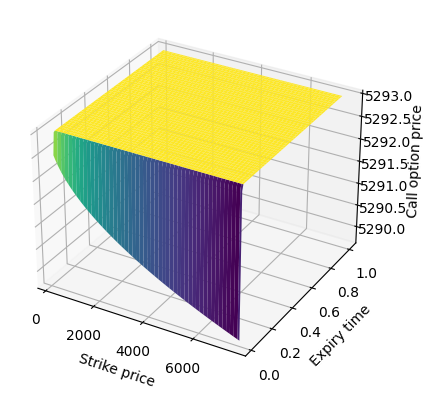

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

S = sp.Symbol('S', real=True, positive=True)
sigma = sp.Symbol('sigma', real=True, positive=True)
r = sp.Symbol('r', real=True, positive=True)
T, K = sp.symbols('T K', real=True, positive=True)
#The fact that you have to import so many libraries and ask GPT how to create symbols in Python is enough to convince me that MATLAB is far better than Python in general
S_value = 5293
sigma_value =   #Here I have taken the same volatility for all strikes and all expiries ; you can create a custom volatility vector in conjunction with your custom strike and expiry vectors to calculate option prices
r_value = 0.01  # Again, I have taken the same risk-free rate for all expiries ; create a custom rfr vector paired up with particular expiries to get varying option prices

PV_K = K * sp.exp(-r * T)  #This is the present value of the strike price as time moves forward

d1 = (sp.log(S/K) + (r + sigma**2 / 2) * T) / (sigma * sp.sqrt(T))
d2 = d1 - sigma * sp.sqrt(T)

def call_option_price(K_val, T_val):
    d1_val = (np.log(S_value / K_val) + (r_value + 0.5 * sigma_value**2) * T_val) / (sigma_value * np.sqrt(T_val))
    d2_val = d1_val - sigma_value * np.sqrt(T_val)
    Nd1 = norm.cdf(d1_val)
    Nd2 = norm.cdf(d2_val)
    PV_K_val = K_val * np.exp(-r_value * T_val)
    C_val = Nd1 * S_value - Nd2 * PV_K_val
    return C_val

K_vals = np.linspace(200, 7500, 100)   # range of strike prices , you make K into a custom vector for particular strike prices and plot on those points only
T_vals = np.linspace(0.0192307692, 1.0, 100) #0.019 for 1 week , you can make T into a custom vector for particular time values and plot on those points only
K_grid, T_grid = np.meshgrid(K_vals, T_vals)
C_vals = np.vectorize(call_option_price)(K_grid, T_grid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_grid, T_grid, C_vals, cmap='viridis') #I do not know what this viridis is , I just asked GPT how to plot 3D in Python

ax.set_xlabel('Strike price')
ax.set_ylabel('Expiry time')
ax.set_zlabel('Call option price')
plt.show()


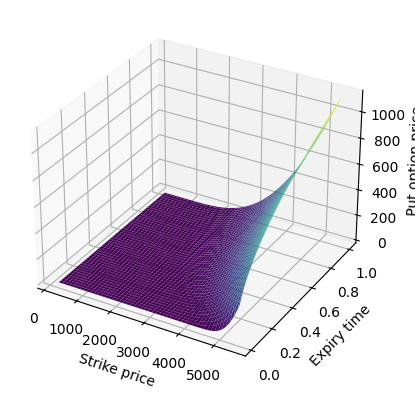

In [2]:
def put_option_price(K_val, T_val):
    d1_val = (np.log(S_value / K_val) + (r_value + 0.5 * sigma_value**2) * T_val) / (sigma_value * np.sqrt(T_val))
    d2_val = d1_val - sigma_value * np.sqrt(T_val)
    Nd1 = norm.cdf(-d1_val)
    Nd2 = norm.cdf(-d2_val)
    PV_K_val = K_val * np.exp(-r_value * T_val)
    P_val = Nd2 * PV_K_val - Nd1 * S_value
    return P_val

K_vals = np.linspace(200, 5500, 100)
T_vals = np.linspace(0.0192307692, 1.0, 100)
K_grid, T_grid = np.meshgrid(K_vals, T_vals)
P_vals = np.vectorize(put_option_price)(K_grid, T_grid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_grid, T_grid, P_vals, cmap='viridis')

ax.set_xlabel('Strike price')
ax.set_ylabel('Expiry time')
ax.set_zlabel('Put option price')
plt.show()
